In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import torch
device = torch.device("cuda") #set pytorch to be used on GPU

In [0]:
#Get interface for working with PyTorch
!pip install transformers

In [0]:
import transformers

In [2]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS545_2020')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'Project')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
x_train = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/training_data.csv')
x_test = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/testing_data.csv')
y_train = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/train_labels.csv')
y_test = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/test_labels.csv')

In [0]:
x_train.drop(columns=['Unnamed: 0'], inplace = True)
x_test.drop(columns=['Unnamed: 0'], inplace = True)
y_train.drop(columns=['Unnamed: 0'], inplace = True)
y_test.drop(columns=['Unnamed: 0'], inplace = True)

In [0]:
fake = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/fakeForModeling.csv')
true = pd.read_csv('/content/gdrive/My Drive/CIS545_2020/Project/trueForModeling.csv')

In [0]:
fake.drop(columns=['Unnamed: 0'], inplace = True)
true.drop(columns=['Unnamed: 0'], inplace = True)

# Binomial Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
lr = LogisticRegression()

lr.fit(x_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_lr = lr.predict(x_test)

In [7]:
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy is:  0.8941226849373729
Mean Squared Error is: 0.32538794547835836


In [8]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

[[4017  505]
 [ 484 4335]]


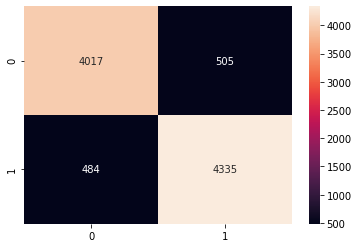

In [9]:
labels = np.array([['4017','505'],['484','4335']])
sns.heatmap(lr_cm, annot=labels, fmt = '')
plt.show()

In [10]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4522
           1       0.90      0.90      0.90      4819

    accuracy                           0.89      9341
   macro avg       0.89      0.89      0.89      9341
weighted avg       0.89      0.89      0.89      9341



In [0]:
# Calculate predicted probabilities for test data 
y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]

In [12]:
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.9554417686734811

# Naive Bayes

In [16]:
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()# one of the two classic naive Bayes variants used in text classification

%time nb.fit(x_train, np.ravel(y_train))

CPU times: user 42.1 ms, sys: 1.46 ms, total: 43.6 ms
Wall time: 39.6 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred_class = nb.predict(x_test)

In [18]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_class))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_class)))

Accuracy is: 0.8610427149127502
Mean Squared Error is: 0.3727697480848597


In [19]:
nb_cm = metrics.confusion_matrix(y_test, y_pred_class)
print(nb_cm)

[[3876  646]
 [ 652 4167]]


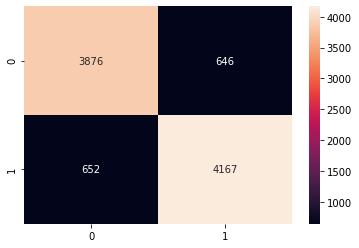

In [20]:
labels =  np.array([['3876','646'],['652','4167']])
sns.heatmap(nb_cm, annot=labels, fmt = '')
plt.show()

In [21]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4522
           1       0.87      0.86      0.87      4819

    accuracy                           0.86      9341
   macro avg       0.86      0.86      0.86      9341
weighted avg       0.86      0.86      0.86      9341



In [0]:
# Calculate predicted probabilities for test data 
y_pred_prob_nb = nb.predict_proba(x_test)[:, 1]

In [23]:
metrics.roc_auc_score(y_test, y_pred_prob_nb)

0.9307757036476302

See which words have the biggest indication of Fake news and which words have the biggest indication of Real News

In [0]:
#Number of times token appears in each True article
true_token = nb.feature_count_[0, :]

#Number of times token appears in each Fake article
fake_token = nb.feature_count_[1, :]

In [56]:
tokens = pd.DataFrame({'token':x_train.columns, 'true':true_token, 'fake':fake_token}).set_index('token')
tokens.head()

,true,fake
token,,
according,391.543167,407.032347
act,221.037092,281.428699
action,285.273320,278.263287
added,315.779870,164.326046
administration,498.607789,352.136160


In [0]:
# add 1 to true and fake counts to avoid dividing by 0
tokens['true'] = tokens.true + 1
tokens['fake'] = tokens.fake + 1

In [0]:
# convert the true and fake counts into frequencies
tokens['true'] = tokens.true / nb.class_count_[0]
tokens['fake'] = tokens.fake / nb.class_count_[1]

In [59]:
# calculate the ratio of fake to true for each token
tokens['fake/true ratio'] = tokens.fake / tokens.true
tokens.sort_values('fake/true ratio', ascending=False).head(10)

,true,fake,fake/true ratio
token,,,
video,0.005782,0.040030,6.923142
fact,0.004353,0.025581,5.876533
hillary,0.008762,0.047256,5.393014
really,0.005104,0.025209,4.938970
got,0.004439,0.021494,4.842391
know,0.008978,0.039264,4.373402
america,0.008584,0.037274,4.342246
story,0.005492,0.022700,4.133175
went,0.004823,0.019103,3.960777


In [60]:
tokens.sort_values('fake/true ratio', ascending=True).head(10)

,true,fake,fake/true ratio
token,,,
minister,0.049143,0.004579,0.093168
wednesday,0.039187,0.008761,0.223561
thursday,0.037885,0.009197,0.242759
tuesday,0.036921,0.009034,0.244693
monday,0.034633,0.008822,0.254719
friday,0.036306,0.009464,0.260674
foreign,0.034608,0.010393,0.300297
international,0.023358,0.007386,0.316202
military,0.036022,0.011809,0.327837


# Support Vector Machines

In [61]:
from sklearn.svm import SVC

#Linear kernel fits decently well, decided not to use another kernel because of parsimony 
#and because linear has the lowest risk of overfitting
svc = SVC(kernel='linear', random_state=1) 
svc.fit(x_train, np.ravel(y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred_svm = svc.predict(x_test)

In [63]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_svm))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_svm)))
print(metrics.classification_report(y_test, y_pred_svm))

Accuracy is: 0.8942297398565464
Mean Squared Error is: 0.3252234003626639
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4522
           1       0.89      0.90      0.90      4819

    accuracy                           0.89      9341
   macro avg       0.89      0.89      0.89      9341
weighted avg       0.89      0.89      0.89      9341



In [67]:
svm_cm = metrics.confusion_matrix(y_test, y_pred_svm)
print(svm_cm)

[[4005  517]
 [ 471 4348]]


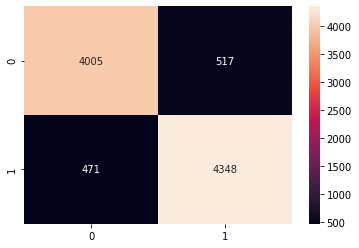

In [76]:
labels =  np.array([['4005','517'],['471','4348']])
sns.heatmap(svm_cm, annot=labels, fmt = '')
plt.show()

In [70]:
print (metrics.roc_auc_score(y_test, y_pred_svm))

0.8939659687773932


# Random Forest

In [27]:
#Tried depths greater and less than 60, 60 was the best. 
#Tried estimators greater and less than 200 but 200 was the best

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 1)

param_grid = {
    'n_estimators': [200],
    'max_depth': [50, 60, 70]
    }

%time grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_search_rf.fit(x_train, np.ravel(y_train))
grid_search_rf.best_params_

CPU times: user 224 µs, sys: 6.99 ms, total: 7.22 ms
Wall time: 7.14 ms


{'max_depth': 50, 'n_estimators': 200}

In [0]:
y_pred_rf = grid_search_rf.predict(x_test)

In [29]:
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_rf))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Accuracy is: 0.9283802590729044
Mean Squared Error is: 0.2676186483171447


In [30]:
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(rf_cm)

[[4097  425]
 [ 244 4575]]


In [31]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4522
           1       0.92      0.95      0.93      4819

    accuracy                           0.93      9341
   macro avg       0.93      0.93      0.93      9341
weighted avg       0.93      0.93      0.93      9341



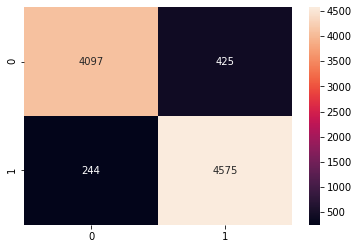

In [72]:
labels = np.array([['4097','425'],['244','4575']])
sns.heatmap(rf_cm, annot=labels, fmt = '')
plt.show()

In [0]:
# Calculate predicted probabilities for test data 
y_pred_prob_rf = grid_search_rf.predict_proba(x_test)[:, 1]

In [73]:
metrics.roc_auc_score(y_test, y_pred_prob_rf)

0.9786879234388352

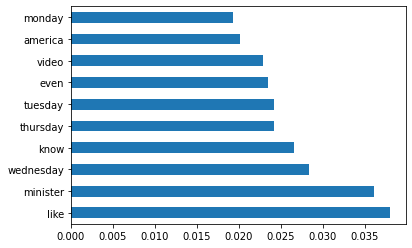

In [37]:
feature_importances = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=x_train.columns)
feature_importances.nlargest(10).plot(kind='barh')

# Neural Network

BERT can be used in two ways: 1) to produce a vector representation of each word as the output or 2) fine-tune the original model and train it on data with a classification as the output.

I use the basic bert-base-uncased model. The maximum number of tokens allowed for BERT is 512, so articles are truncated. This could pose a possible issue.

In [0]:
import sklearn.model_selection as ms

#Create new train-test set
X = pd.concat([true["text"], fake["text"]])
true["label"] = [0 for x in true["label"]]
fake["label"] = [1 for x in fake["label"]]
y = pd.concat([true["label"], fake["label"]])

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state=1)
train_data = pd.concat([X_train, y_train],axis = 1).reset_index(drop=True)
test_data = pd.concat([X_test, y_test],axis = 1).reset_index(drop=True)

In [0]:
X = pd.DataFrame(X)
articles = X["text"].tolist()
y = pd.DataFrame(y)
labels = y["label"].tolist()

In [0]:
#Create new tokenizer because it's best to tokenize with the same tokenizer 
#that BERT was trained on instead of self-defined one 
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Note: attention_masks adds 1 to the scores for positions that are taken up by real tokens and adds 0 to the positions outside current sequence

In [0]:
# Tokenize all of the articles and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for article in articles:
    encoded_dict = tokenizer.encode_plus(
                        article,                      #Article to encode
                        add_special_tokens = True, #Add [CLS] to start, [SEP] to end
                        max_length = 64,           #Pad & truncate all sentences
                        pad_to_max_length = True,
                        return_attention_mask = True,   #Create masks
                        return_tensors = 'pt',     # Return pytorch tensors
                   )
    
    #Add the encoded sentence to the list    
    input_ids.append(encoded_dict['input_ids'])
    
    # Add attention mask (simply differentiates padding from non-padding)
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors
input_ids = torch.cat(input_ids, dim=0) #encoded sentence
attention_masks = torch.cat(attention_masks, dim=0) #mask
labels = torch.tensor(labels) #labels (fake/true)

In [0]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 70-10-20 train-validation-test split

# Calculate the number of samples to include in each set.
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset)) + 1 #add 1 because int() causes 1 row to be left out
test_size = int(0.2 * len(dataset)) 

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
print('{:>5,} test samples'.format(test_size))

32,692 training samples
4,671 validation samples
9,340 test samples


In [0]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

#BERT developers recommend 16 or 32 batch_size
batch_size = 16

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size)

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially, since order doesn't matter here
            batch_size = batch_size)

test_dataloader = DataLoader(
            test_dataset, 
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially, since order doesn't matter here
            batch_size = batch_size)

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer  
# Don't output all layers due to memory limits
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab
    num_labels = 2, #binary classification  
    output_attentions = False, 
    output_hidden_states = False)

#run model on the GPU
model.cuda()

In [0]:
#Use Adam optimizer
optimizer = AdamW(model.parameters(),
                  lr = 0.00002,
                  eps = 1e-8) # default is 1e-8

In [0]:
from transformers import get_linear_schedule_with_warmup

# BERT authors recommend between 2 and 4 epochs
epochs = 4

# number of batches x number of epochs
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler to reduce the learning rate as training epochs increase
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, #default
                                            num_training_steps = total_steps)

In [0]:
def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return metrics.accuracy_score(pred_flat, labels_flat)

In [0]:
import time
import datetime

#Takes a time in seconds and returns a string hh:mm:ss
def format_time(elapsed):
    
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [0]:
import random

#Use a seed to ensure reproductibility
seed_val = 22

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()


for epoch_i in range(0, epochs):
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))

    # Measure how long the training epoch takes
    t0 = time.time()

    # Reset the total loss for this epoch
    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes
            elapsed = format_time(time.time() - t0)
            
            # Report progress
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device) #copy each tensor to the GPU
        b_input_mask = batch[1].to(device) #copy each tensor to the GPU
        b_labels = batch[2].to(device) #copy each tensor to the GPU

        model.zero_grad()        

        # Perform forward pass 
        # Returns the loss (because we provided labels) and the "logits" - the model
        # outputs prior to activation
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        total_train_loss += loss.item()
        loss.backward()

        # Clip the norm of the gradients to 1.0
        # This is to help prevent the "exploding gradients" problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step() # Update the learning rate

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device) #copy each tensor to the GPU
        b_input_mask = batch[1].to(device) #copy each tensor to the GPU
        b_labels = batch[2].to(device) #copy each tensor to the GPU
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)         
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += accuracy(logits, label_ids)
        
    # Report the final accuracy for this validation run
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


  Batch    40  of  2,044.    Elapsed: 0:00:11.
  Batch    80  of  2,044.    Elapsed: 0:00:21.
  Batch   120  of  2,044.    Elapsed: 0:00:32.
  Batch   160  of  2,044.    Elapsed: 0:00:42.
  Batch   200  of  2,044.    Elapsed: 0:00:53.
  Batch   240  of  2,044.    Elapsed: 0:01:03.
  Batch   280  of  2,044.    Elapsed: 0:01:14.
  Batch   320  of  2,044.    Elapsed: 0:01:24.
  Batch   360  of  2,044.    Elapsed: 0:01:35.
  Batch   400  of  2,044.    Elapsed: 0:01:45.
  Batch   440  of  2,044.    Elapsed: 0:01:56.
  Batch   480  of  2,044.    Elapsed: 0:02:06.
  Batch   520  of  2,044.    Elapsed: 0:02:17.
  Batch   560  of  2,044.    Elapsed: 0:02:27.
  Batch   600  of  2,044.    Elapsed: 0:02:37.
  Batch   640  of  2,044.    Elapsed: 0:02:48.
  Batch   680  of  2,044.    Elapsed: 0:02:59.
  Batch   720  of  2,044.    Elapsed: 0:03:09.
  Batch   760  of  2,044.    Elapsed: 0:03:19.
  Batch   800  of  2,044.    Elapsed: 0:03:30.
  Batch   840  of  2,044.    Elapsed: 0:03:40.
  Batch   880

In [0]:
pd.set_option('precision', 2)

df_stats = pd.DataFrame(data=training_stats)

df_stats = df_stats.set_index('epoch')

df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,1.03e-01,0.04,0.99,0:08:54,0:00:19
2,2.45e-02,0.04,0.99,0:08:49,0:00:19
3,7.39e-03,0.06,0.99,0:08:48,0:00:19
4,1.06e-03,0.05,0.99,0:08:48,0:00:19


In [0]:
sns.set(style='darkgrid')

sns.set(font_scale=0.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [0]:
model.eval()

predictions , true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [0]:
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print("Accuracy is:", metrics.accuracy_score(flat_predictions,flat_true_labels))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(flat_predictions, flat_true_labels)))
b_cm = metrics.confusion_matrix(flat_predictions,flat_true_labels)
print(b_cm)

Accuracy is: 0.99796573875803
Mean Squared Error is: 0.04510278530168643
[[4519   12]
 [   7 4802]]


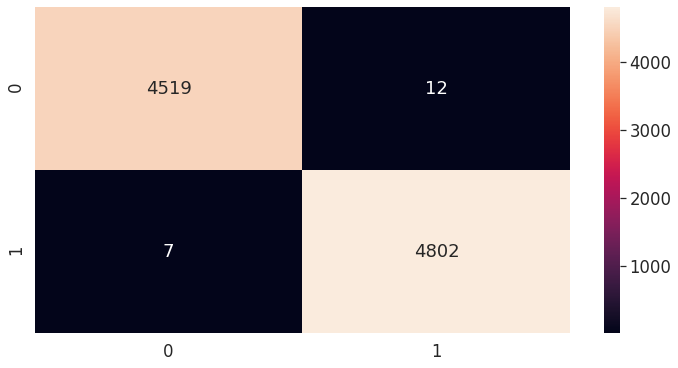

In [0]:
labels = np.array([['4519','12'],['7','4802']])
sns.heatmap(b_cm, annot=labels, fmt = '')
plt.show()

In [0]:
print (metrics.roc_auc_score(flat_predictions, flat_true_labels))
print(metrics.classification_report(flat_predictions, flat_true_labels))

0.9979479869712031
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4531
           1       1.00      1.00      1.00      4809

    accuracy                           1.00      9340
   macro avg       1.00      1.00      1.00      9340
weighted avg       1.00      1.00      1.00      9340

